# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [61]:
X.shape

(70000, 784)

In [62]:
y.shape

(70000,)

In [88]:
data = pd.DataFrame(X)

In [100]:
y = pd.DataFrame(y)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [63]:
import matplotlib

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

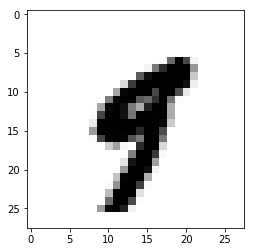

In [90]:
f = X[36000].reshape(-1,28)
plt.imshow(f, cmap = matplotlib.cm.binary, interpolation = 'nearest')

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [102]:
X_train = data.iloc[0:60000]
X_test = data.iloc[60000::]
y_train = y[0:60000]
y_test = y[60000::]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [114]:
def five(x):
    if int(x) == 5:
        return 1
    else:
        return 0

In [119]:
y_train5 =  y_train.apply(lambda x : five(x), axis=1)
y_test5 = y_test.apply(lambda x : five(x), axis=1) 

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train, y_train5)
pred = model.predict(X_train)

/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [127]:
mycross = KFold(5)

In [141]:
scores = []

for indexTrain, index_test in mycross.split(X_train):
    
    Xcross_train = X_train.iloc[indexTrain]
    ycross_train = y_train5.iloc[indexTrain]
    
    Xcross_test = X_train.iloc[index_test]
    ycross_test = y_train5.iloc[index_test]
    
    model = LogisticRegression()

    model.fit(Xcross_train, ycross_train)
    pred = model.predict(Xcross_test)
    
    scores.append( accuracy_score(ycross_test, pred) )
        

/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rob/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [157]:
np.mean(scores)

0.9741333333333333

In [192]:
pred = model.predict(X_test)

### Does the classifier predict correctly the 36000th digit we picked before?

In [162]:
# Yes
pred.shape

(10000,)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [152]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [184]:
modelNever5 = Never5Classifier()

In [185]:
modelNever5.fit(X_test,y_test)

In [199]:
predNever5 = modelNever5.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [190]:
from yellowbrick.classifier import confusion_matrix
from sklearn.metrics import classification_report

In [197]:
print(classification_report(y_test5, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9108
           1       0.90      0.83      0.86       892

    accuracy                           0.98     10000
   macro avg       0.94      0.91      0.93     10000
weighted avg       0.98      0.98      0.98     10000



ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaf0505110>,
                classes=None,
                cmap=<matplotlib.colors.ListedColormap object at 0x7fcaf0ef3190>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

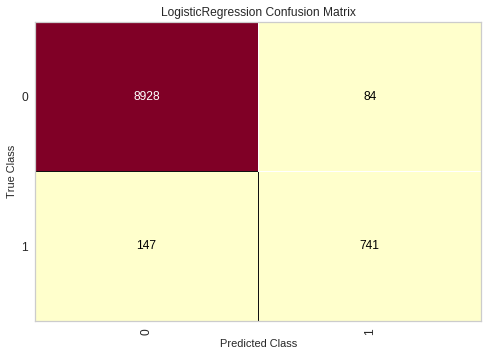

In [198]:
confusion_matrix(model, X_test, y_test5, test_size = 0.99)

In [200]:
print(classification_report(y_test5, predNever5))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9108
           1       0.00      0.00      0.00       892

    accuracy                           0.91     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.83      0.91      0.87     10000



/home/rob/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

### What does this metric tell you? Which classifier works better with this metric in mind?